In [21]:
import pandas as pd
import seaborn as sns

In [11]:
# load the dataframe
df = pd.read_csv('data/89-90.csv')
df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,Id
0,1,Keith Acton,31,PHI,C,69,13,14,27,-2,...,2,0,14,0,0,94,13.8,NaN,NaN,actonke01
1,2,Greg Adams,26,VAN,LW,65,30,20,50,-8,...,0,1,14,6,0,181,16.6,NaN,NaN,adamsgr02
2,3,Greg Adams,29,TOT,LW,35,4,10,14,-2,...,0,0,9,1,0,27,14.8,NaN,NaN,adamsgr01
3,3,Greg Adams,29,DET,LW,28,3,7,10,0,...,0,0,7,0,0,19,15.8,NaN,NaN,adamsgr01
4,3,Greg Adams,29,QUE,LW,7,1,3,4,-2,...,0,0,2,1,0,8,12.5,NaN,NaN,adamsgr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,651,Zarley Zalapski,21,PIT,D,51,6,25,31,-14,...,0,2,11,14,0,85,7.1,NaN,NaN,zalapza01
770,652,Richard Zemlak,26,PIT,RW,19,1,5,6,-6,...,0,0,5,0,0,11,9.1,NaN,NaN,zemlari01
771,653,Rob Zettler,21,MNS,D,31,0,8,8,-7,...,0,0,7,1,0,21,0.0,NaN,NaN,zettlro01
772,654,Peter Zezel,24,STL,C,73,25,47,72,-9,...,0,3,20,27,0,158,15.8,NaN,NaN,zezelpe01


In [12]:
### Drop duplicate rows based on playerID
# players that have been traded have multiple rows
# keeping the first gives their total stats for the season
df = df.drop_duplicates(subset='Id', keep="first")
df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,Id
0,1,Keith Acton,31,PHI,C,69,13,14,27,-2,...,2,0,14,0,0,94,13.8,NaN,NaN,actonke01
1,2,Greg Adams,26,VAN,LW,65,30,20,50,-8,...,0,1,14,6,0,181,16.6,NaN,NaN,adamsgr02
2,3,Greg Adams,29,TOT,LW,35,4,10,14,-2,...,0,0,9,1,0,27,14.8,NaN,NaN,adamsgr01
5,4,Jim Agnew,23,VAN,D,7,0,0,0,-1,...,0,0,0,0,0,3,0.0,NaN,NaN,agnewji01
6,5,Tommy Albelin,25,NJD,D,68,6,23,29,-1,...,0,0,14,9,0,125,4.8,NaN,NaN,albelto01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,651,Zarley Zalapski,21,PIT,D,51,6,25,31,-14,...,0,2,11,14,0,85,7.1,NaN,NaN,zalapza01
770,652,Richard Zemlak,26,PIT,RW,19,1,5,6,-6,...,0,0,5,0,0,11,9.1,NaN,NaN,zemlari01
771,653,Rob Zettler,21,MNS,D,31,0,8,8,-7,...,0,0,7,1,0,21,0.0,NaN,NaN,zettlro01
772,654,Peter Zezel,24,STL,C,73,25,47,72,-9,...,0,3,20,27,0,158,15.8,NaN,NaN,zezelpe01


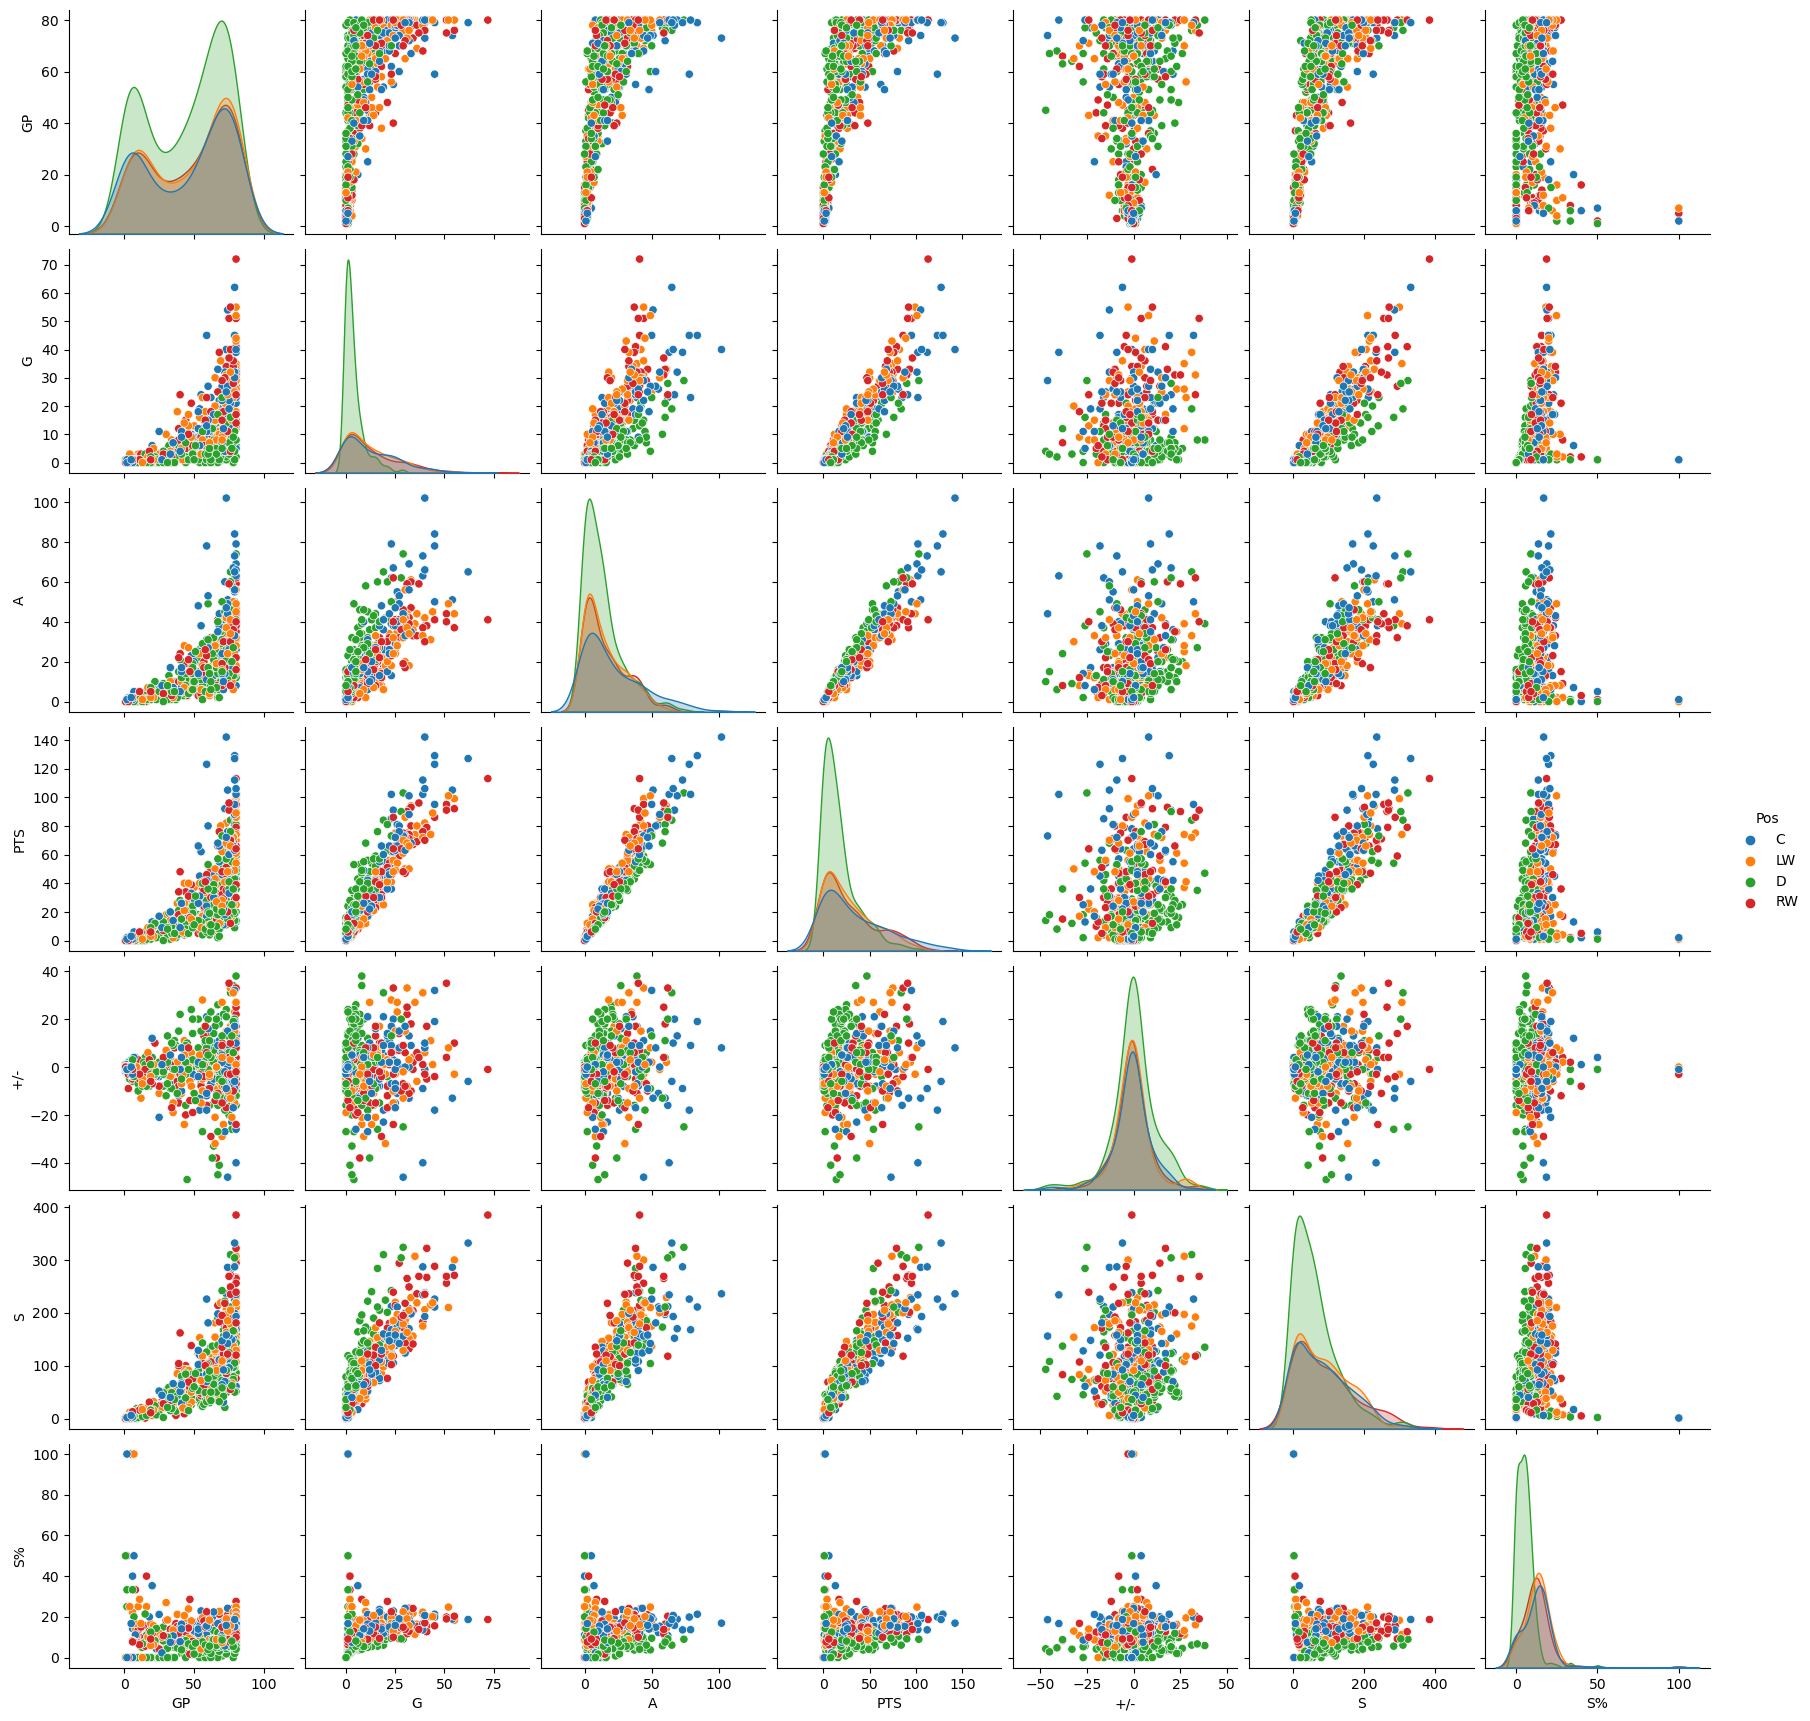

In [26]:
sns.pairplot(df, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')

In [28]:
df = pd.read_csv('data/90-91.csv')
df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,Id
0,1,Keith Acton,32,PHI,C,76,14,23,37,-9,...,1,1,18,5,0,120,11.7,NaN,NaN,actonke01
1,2,Greg Adams,27,VAN,LW,55,21,24,45,-5,...,1,2,16,7,1,148,14.2,NaN,NaN,adamsgr02
2,3,Jim Agnew,24,VAN,D,20,0,0,0,-11,...,0,0,0,0,0,12,0.0,NaN,NaN,agnewji01
3,4,Brad Aitken,23,TOT,LW,9,0,2,2,-3,...,0,0,2,0,0,3,0.0,NaN,NaN,aitkebr01
4,4,Brad Aitken,23,PIT,LW,6,0,1,1,-2,...,0,0,1,0,0,3,0.0,NaN,NaN,aitkebr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,657,Rob Zettler,22,MNS,D,47,1,4,5,-10,...,0,0,2,1,1,30,3.3,NaN,NaN,zettlro01
803,658,Peter Zezel,25,TOT,C,52,21,19,40,-20,...,0,5,11,8,0,90,23.3,NaN,NaN,zezelpe01
804,658,Peter Zezel,25,TOR,C,32,14,14,28,-7,...,0,5,8,6,0,69,20.3,NaN,NaN,zezelpe01
805,658,Peter Zezel,25,WSH,C,20,7,5,12,-13,...,0,0,3,2,0,21,33.3,NaN,NaN,zezelpe01
